# Data Science Project: World Cup Predictions

Javier Canto & Alexei

# 1. Data Cleaning and Aggregation 

Importing all the libraries we are gonna use.

In [389]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import pylab as pyl

Reading our csv file with the data.

In [390]:
dcsv = pd.read_csv('international_matches.csv')
df = pd.DataFrame(dcsv)

Showing our initial data frame.

In [391]:
df

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0


Get familiar with the data we are working with.

In [392]:
df.dtypes

date                              object
home_team                         object
away_team                         object
home_team_continent               object
away_team_continent               object
home_team_fifa_rank                int64
away_team_fifa_rank                int64
home_team_total_fifa_points        int64
away_team_total_fifa_points        int64
home_team_score                    int64
away_team_score                    int64
tournament                        object
city                              object
country                           object
neutral_location                    bool
shoot_out                         object
home_team_result                  object
home_team_goalkeeper_score       float64
away_team_goalkeeper_score       float64
home_team_mean_defense_score     float64
home_team_mean_offense_score     float64
home_team_mean_midfield_score    float64
away_team_mean_defense_score     float64
away_team_mean_offense_score     float64
away_team_mean_m

In [393]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           23921 non-null  object 
 1   home_team                      23921 non-null  object 
 2   away_team                      23921 non-null  object 
 3   home_team_continent            23921 non-null  object 
 4   away_team_continent            23921 non-null  object 
 5   home_team_fifa_rank            23921 non-null  int64  
 6   away_team_fifa_rank            23921 non-null  int64  
 7   home_team_total_fifa_points    23921 non-null  int64  
 8   away_team_total_fifa_points    23921 non-null  int64  
 9   home_team_score                23921 non-null  int64  
 10  away_team_score                23921 non-null  int64  
 11  tournament                     23921 non-null  object 
 12  city                           23921 non-null 

In [394]:
df.describe()

,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
count,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,8379.000000,8095.000000,7787.000000,8510.000000,8162.000000,7564.000000,8312.000000,7979.000000
mean,77.854688,80.797375,323.401488,315.453576,1.609214,1.068266,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143
std,52.355225,53.232902,500.825725,490.944273,1.630127,1.263944,8.212242,8.225919,6.003114,6.268416,6.053110,5.937425,6.201906,6.124573
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,47.000000,47.000000,52.800000,53.300000,54.200000,52.800000,53.300000,54.200000
25%,33.000000,36.000000,0.000000,0.000000,0.000000,0.000000,70.000000,69.000000,71.000000,71.700000,72.500000,70.500000,71.300000,71.800000
50%,71.000000,73.000000,0.000000,0.000000,1.000000,1.000000,75.000000,74.000000,75.200000,75.700000,76.200000,74.500000,75.300000,75.500000
75%,115.000000,119.000000,547.000000,523.000000,2.000000,2.000000,81.000000,80.000000,78.800000,80.000000,79.500000,78.200000,79.700000,79.000000
max,211.000000,211.000000,2164.000000,2164.000000,31.000000,21.000000,97.000000,97.000000,91.800000,93.000000,93.200000,91.800000,93.000000,93.200000


Transform the data types from date (object) to date time.

In [395]:
df["date"] = pd.to_datetime(df["date"])
df.dtypes

date                             datetime64[ns]
home_team                                object
away_team                                object
home_team_continent                      object
away_team_continent                      object
home_team_fifa_rank                       int64
away_team_fifa_rank                       int64
home_team_total_fifa_points               int64
away_team_total_fifa_points               int64
home_team_score                           int64
away_team_score                           int64
tournament                               object
city                                     object
country                                  object
neutral_location                           bool
shoot_out                                object
home_team_result                         object
home_team_goalkeeper_score              float64
away_team_goalkeeper_score              float64
home_team_mean_defense_score            float64
home_team_mean_offense_score            

Drop the columns that are not useful.

In [396]:
df.drop("home_team_goalkeeper_score",inplace=True,axis=1)
df.drop("away_team_goalkeeper_score",inplace=True,axis=1)
df.drop("home_team_mean_defense_score",inplace=True,axis=1)
df.drop("home_team_mean_offense_score",inplace=True,axis=1)
df.drop("home_team_mean_midfield_score",inplace=True,axis=1)
df.drop("away_team_mean_defense_score",inplace=True,axis=1)
df.drop("away_team_mean_offense_score",inplace=True,axis=1)
df.drop("away_team_mean_midfield_score",inplace=True,axis=1)
df.dtypes

date                           datetime64[ns]
home_team                              object
away_team                              object
home_team_continent                    object
away_team_continent                    object
home_team_fifa_rank                     int64
away_team_fifa_rank                     int64
home_team_total_fifa_points             int64
away_team_total_fifa_points             int64
home_team_score                         int64
away_team_score                         int64
tournament                             object
city                                   object
country                                object
neutral_location                         bool
shoot_out                              object
home_team_result                       object
dtype: object

Our new data frame

In [397]:
df

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,tournament,city,country,neutral_location,shoot_out,home_team_result
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,No,Win
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,1,Friendly,Maceió,Brazil,False,No,Draw
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,0,FIFA World Cup qualification,Quito,Ecuador,False,No,Win
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,0,Friendly,Conakry,Guinea,False,No,Win
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,No,Lose
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,1,UEFA Nations League,Chișinău,Moldova,False,No,Win
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,2,UEFA Nations League,Vaduz,Liechtenstein,False,No,Lose
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,0,Kirin Cup,Suita,Japan,True,Yes,Lose
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,3,Kirin Cup,Suita,Japan,False,No,Lose


Let's query the World Cup games.

In [398]:
x = df[["date", "home_team", "away_team", "home_team_result", "tournament"]].query("tournament == 'FIFA World Cup'")
x

,date,home_team,away_team,home_team_result,tournament
385,1994-06-17,Germany,Bolivia,Win,FIFA World Cup
386,1994-06-17,Spain,Korea Republic,Draw,FIFA World Cup
387,1994-06-18,Colombia,Romania,Lose,FIFA World Cup
388,1994-06-18,Italy,Republic of Ireland,Lose,FIFA World Cup
389,1994-06-18,USA,Switzerland,Draw,FIFA World Cup
...,...,...,...,...,...
20445,2018-07-07,Russia,Croatia,Lose,FIFA World Cup
20446,2018-07-10,France,Belgium,Win,FIFA World Cup
20447,2018-07-11,Croatia,England,Win,FIFA World Cup
20448,2018-07-14,Belgium,England,Win,FIFA World Cup


Mean, median, mode, s.max()-s.min(), quantiles and standard deviation from the goals made by the home and away team.

In [399]:
s = df["home_team_score"]
s.mean(), s.median(), s.mode()

(1.6092136616362192,
 1.0,
 0    1
 Name: home_team_score, dtype: int64)

In [400]:
s = df["home_team_score"]
s.max()-s.min(), s.quantile(0.75)-s.quantile(0.25), s.std()  	

(31, 2.0, 1.6301267123145093)

In [401]:
s = df["away_team_score"]
s.mean(), s.median(), s.mode()

(1.0682663768237113,
 1.0,
 0    0
 Name: away_team_score, dtype: int64)

In [402]:
s = df["away_team_score"]
s.max()-s.min(), s.quantile(0.75)-s.quantile(0.25), s.std()  	

(21, 2.0, 1.2639443128676153)

All the tourmants names in the data

In [403]:
s = df["tournament"].unique()
s

array(['FIFA World Cup qualification', 'Friendly',
       'African Cup of Nations qualification', 'Amílcar Cabral Cup',
       'CFU Caribbean Cup qualification',
       'United Arab Emirates Friendship Tournament',
       'Malta International Tournament', 'Lunar New Year Cup',
       'African Cup of Nations', 'CFU Caribbean Cup',
       'UEFA Euro qualification', 'Kirin Cup', 'FIFA World Cup',
       'Oceania Nations Cup qualification', 'Baltic Cup', 'Gulf Cup',
       'Simba Tournament', 'CECAFA Cup', 'Confederations Cup',
       'Dynasty Cup', "King's Cup", 'Nehru Cup', 'SAFF Cup',
       'Copa Paz del Chaco', 'Korea Cup', 'USA Cup', 'Copa América',
       'Merdeka Tournament', 'South Pacific Games', 'UNCAF Cup',
       'Oceania Nations Cup', 'Windward Islands Tournament', 'Gold Cup',
       'AFC Asian Cup qualification', 'UEFA Euro', 'AFF Championship',
       'AFC Asian Cup', 'King Hassan II Tournament',
       'Cyprus International Tournament', 'Dunhill Cup',
       'COSAFA Cup qu

Count the numbers of names in the data.

In [404]:
s = df["tournament"].nunique()
s

82

Number of games with penalties.

In [405]:
df['Penalties'] = df['shoot_out'].map( {'Yes': 1, 'No': 0} ).astype(int)
x = df[["Penalties"]].query("Penalties == 1")
games_with_penalities = x.sum()
games_with_penalities

Penalties    332
dtype: int64

In [406]:
df

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,tournament,city,country,neutral_location,shoot_out,home_team_result,Penalties
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,No,Win,0
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,1,Friendly,Maceió,Brazil,False,No,Draw,0
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,0,FIFA World Cup qualification,Quito,Ecuador,False,No,Win,0
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,0,Friendly,Conakry,Guinea,False,No,Win,0
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,No,Lose,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,1,UEFA Nations League,Chișinău,Moldova,False,No,Win,0
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,2,UEFA Nations League,Vaduz,Liechtenstein,False,No,Lose,0
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,0,Kirin Cup,Suita,Japan,True,Yes,Lose,1
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,3,Kirin Cup,Suita,Japan,False,No,Lose,0


# TODO: filter this to show how many world cup game were won in shoot outs.

In [407]:
x = df.groupby("tournament")['Penalties'].sum()
x

tournament
ABCS Tournament                                1
AFC Asian Cup                                 15
AFC Asian Cup qualification                    0
AFC Challenge Cup                              0
AFC Challenge Cup qualification                0
                                              ..
USA Cup                                        0
United Arab Emirates Friendship Tournament     1
VFF Cup                                        0
WAFF Championship                              3
Windward Islands Tournament                    0
Name: Penalties, Length: 82, dtype: int64

We changed the values win, draw and lose to 2, 1 and 0 and we group by home team and sum all the win/draws/lose games. 

In [408]:
df['Result'] = df['home_team_result'].map( {'Lose': 0, 'Draw': 1, 'Win': 2} ).astype(int)
df.head(10)

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,tournament,city,country,neutral_location,shoot_out,home_team_result,Penalties,Result
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,No,Win,0,2
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,1,Friendly,Maceió,Brazil,False,No,Draw,0,1
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,0,FIFA World Cup qualification,Quito,Ecuador,False,No,Win,0,2
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,0,Friendly,Conakry,Guinea,False,No,Win,0,2
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,No,Lose,0,0
5,1993-08-08,Peru,Colombia,South America,South America,70,19,0,0,0,1,FIFA World Cup qualification,Lima,Peru,False,No,Lose,0,0
6,1993-08-08,Zimbabwe,Eswatini,Africa,Africa,50,102,0,0,2,0,Friendly,Harare,Zimbabwe,False,No,Win,0,2
7,1993-08-09,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,4,0,Friendly,Conakry,Guinea,False,No,Win,0,2
8,1993-08-11,Faroe Islands,Norway,Europe,Europe,111,9,0,0,0,7,Friendly,Toftir,Faroe Islands,False,No,Lose,0,0
9,1993-08-11,Sweden,Switzerland,Europe,Europe,4,3,0,0,1,2,Friendly,Borås,Sweden,False,No,Lose,0,0


We now sum all the results by team and sorting them by the team with more wins (this also implies that the team had many games as local and win most of them).

In [409]:
z = df.groupby("home_team")['Result'].sum().sort_values(ascending = False)
z

home_team
Mexico                      446
USA                         444
Brazil                      393
Saudi Arabia                381
Japan                       371
                           ... 
Somalia                       5
US Virgin Islands             4
San Marino                    4
Turks and Caicos Islands      4
Anguilla                      4
Name: Result, Length: 211, dtype: int64

Number of games Mexico had as local.

In [410]:
m = df.query('home_team == "Mexico"').shape[0]
m

316

Number of games Mexico had as visitor.

In [411]:
m = df.query('away_team == "Mexico"').shape[0]
m

201

Number of games Mexico had in total

In [412]:
w = df.query('home_team == "Mexico" or away_team == "Mexico"').shape[0]
w

517

# 2. Exploratory Data Anaysis 

# TODO: MANY GRAPHS

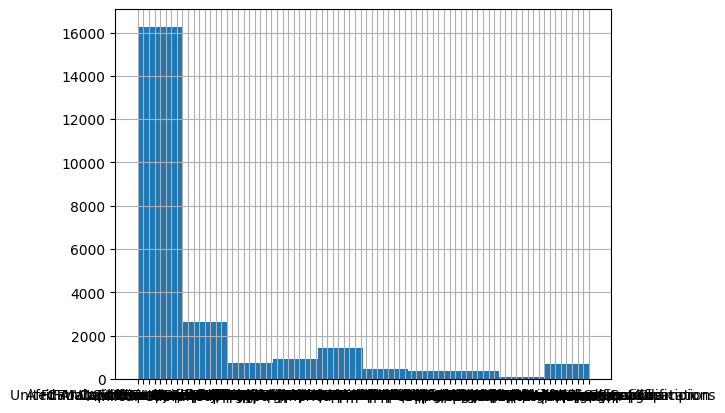

In [413]:
df['tournament'].hist()
pyl.show()